# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

## Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

In [2]:
#!pip install Pillow==9.1.0
# !sudo apt install tesseract-ocr
# !pip install pytesseract

## Importando as bibliotecas

In [38]:
import pytesseract
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import re 

fonte = 'fonts/calibri.ttf'
%matplotlib inline


## Leitura da imagem

In [39]:
img = cv2.imread('teste1.jpeg')

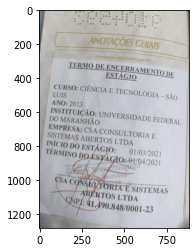

In [40]:
plt.imshow(img)


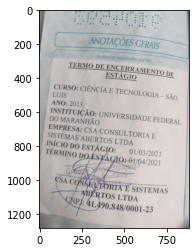

In [41]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [45]:
config_tesseract = '--tessdata-dir tessdata --psm 6 --oem 1'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

RRRRR RR SCE...
odio. Pos + Roso .%, s
As
“SANOTAÇÕES Gerais
a |
 TERMODE ENCERRAMENTO DE
Fa ESTÁGIO RE
| CURSO: CIÊNCIA E TECNOLOGIA - são
E Luis
— ANO:2013
ai INSTITUIÇÃO: UNIVERSIDADE FEDERAL
DO MARANHÃO
EMPRESA; CSA CONSULTORIA E
SISTEMAS ABERTOS LTDA
INÍCIO DO ESTÁG O: 01/03/202]
TÉRMINO pq PSPÁGIO:-01/04/202)
CÁ , Me Sua
| A fe
OA CONgLis DÓRIA É SISTEMAS
“q PERTOS LTDA
E 7 "1.490,848/0001-23 |



## Suporte para caracteres e símbolos de outros idiomas

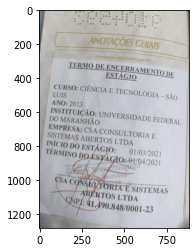

In [14]:
img = cv2.imread('teste1.jpeg')
plt.imshow(img)

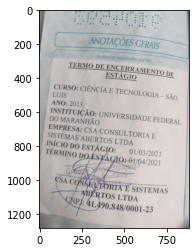

In [21]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [22]:
texto = pytesseract.image_to_string(rgb)
print(texto) # resumé, fiancé, déjà vu

   

7

u

4 CURSO: CIENCIA £ TECNOLOGIA — SAO
| LUIS

| ANO: 2013
INSTITUL

       
   
  

PYORTA FE. SISTEMAS
PERTOS LTDA
4 90.848/0001 -23



In [23]:
!tesseract --list-langs

List of available languages (4):
Latin
eng
osd
por


In [ ]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



## Parâmetros

### Page segmentation modes (PSM)

In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


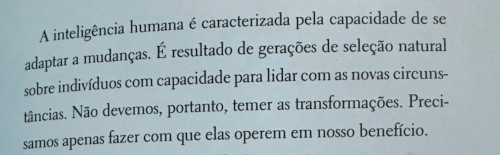

In [ ]:
img = cv2.imread('trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââ%%ã%ãâêâã%%?ª%%ã



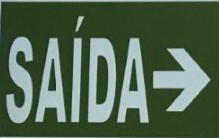

In [ ]:
img = cv2.imread('saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### Detecção de orientação da página

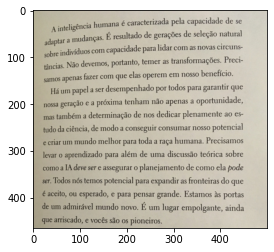

In [ ]:
img = Image.open('livro01.jpg')
plt.imshow(img)

In [ ]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.77
Script: Latin
Script confidence: 13.33



# Seleção dos textos



In [4]:
from pytesseract import Output

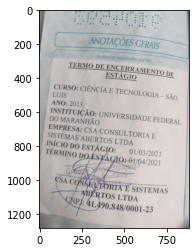

In [2]:
img = cv2.imread('teste1.jpeg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [6]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
# pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,

In [7]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [8]:
len(resultado['text'])

96

In [9]:
min_conf = 60

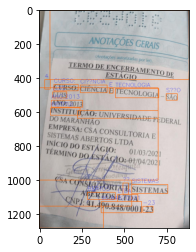

In [16]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    #print(x, y)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
plt.imshow(img_copia)

In [18]:
img = cv2.imread('imgs/teste04.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [26]:
config_tesseract = "--tessdata-dir tessdata --psm 4"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1],
 'left': [0, 40, 40, 40, 40, 551, 517, 208, 208],
 'top': [0, 45, 45, 45, 45, 49, 128, 213, 213],
 'width': [700, 517, 517, 517, 437, 3, 40, 234, 234],
 'height': [400, 270, 230, 230, 230, 3, 45, 102, 102],
 'conf': [-1, -1, -1, -1, 51, 63, 83, -1, 87],
 'text': ['', '', '', '', '“estando', 'o', 'o', '', 'OCR..']}

In [23]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

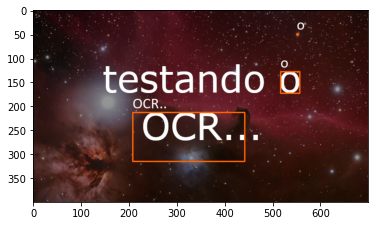

In [24]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
plt.imshow(img_copia)

# Buscando informações específicas na imagem 

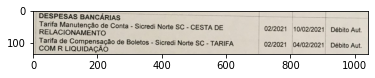

In [28]:
img = cv2.imread("imgs/tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [29]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
# resultado

In [30]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

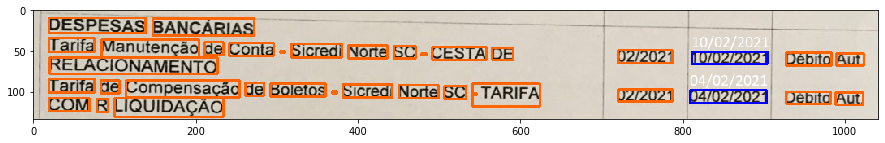

In [37]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 20)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
plt.figure(figsize = (20,2))
plt.imshow(img_copia, interpolation='nearest')

In [ ]:
datas

['10/02/2021', '04/02/2021']

# Detecção de texto em cenários naturais

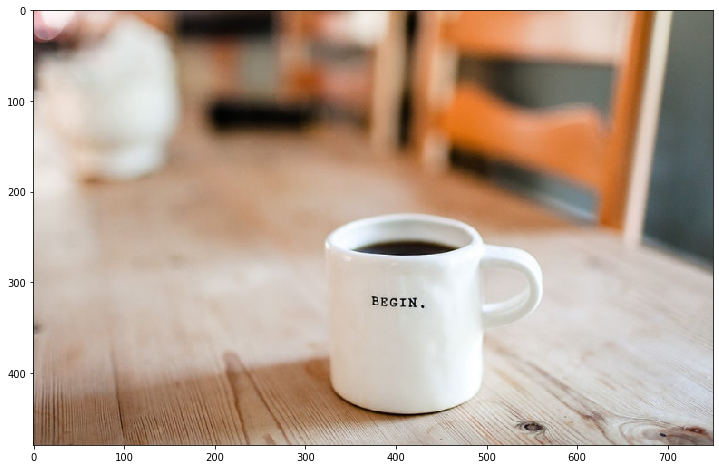

In [54]:
img = cv2.imread("content/caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,8))
plt.imshow(rgb, interpolation='nearest')

In [63]:
resultado = pytesseract.image_to_data(otsu, lang="por", output_type=Output.DICT)

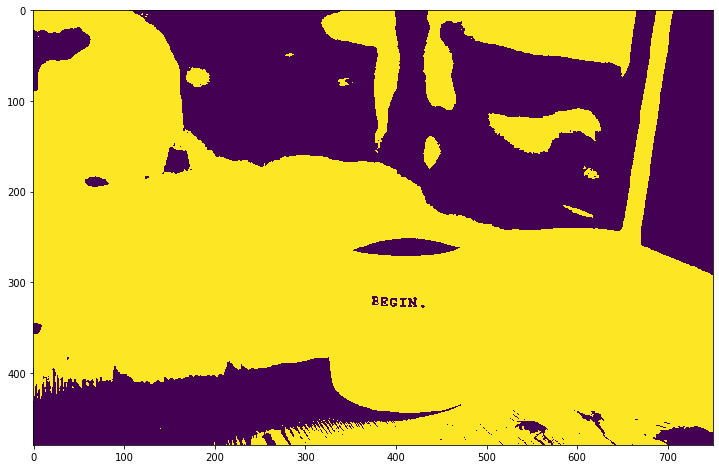

In [64]:
img_copia = otsu.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
plt.figure(figsize = (20,8))
plt.imshow(img_copia, interpolation='nearest')

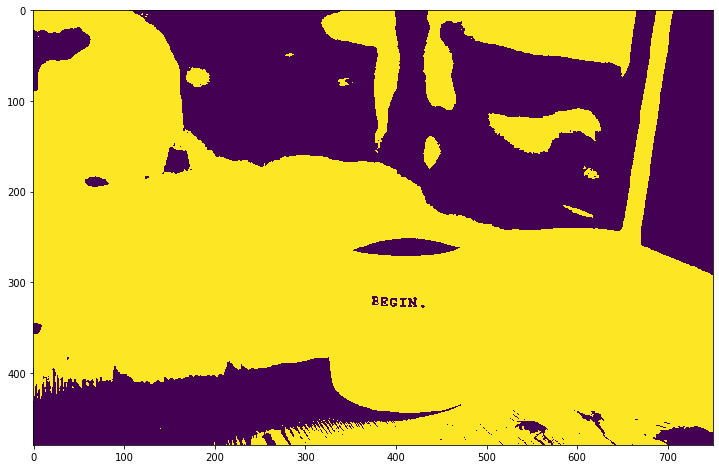

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize = (20,8))
plt.imshow(otsu, interpolation='nearest')